# Programming Exercise 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.linalg as la
import scipy.stats as stats

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading

After completing each part of the assignment, be sure to submit your solutions to the grader.

For this programming exercise, you are only required to complete the first part of the exercise to implement linear regression with one variable. The second part of the exercise, which is optional, covers linear regression with multiple variables. The following is a breakdown of how each part of this exercise is scored.

**Required Exercises**

| Section | Part                                           |Submitted Function                     | Points 
|---------|:-                                             |:-                                     | :-:    
| 1       | [Warm up exercise](#section1)                  | [`warmUpExercise`](#warmUpExercise)    |  10    
| 2       | [Compute cost for one variable](#section2)     | [`computeCost`](#computeCost)         |  40    
| 3       | [Gradient descent for one variable](#section3) | [`gradientDescent`](#gradientDescent) |  50    
|         | Total Points                                   |                                       | 100    

**Optional Exercises**

| Section | Part                                                 | Submitted Function | Points |
|:-------:|:-                                                    |:-:                  | :-:    |
| 4       | [Feature normalization](#section4)                   | [`featureNormalize`](#featureNormalize) | 0      |
| 5       | [Compute cost for multiple variables](#section5)     | [`computeCostMulti`](#computeCostMulti) | 0      |
| 6       | [Gradient descent for multiple variables](#section5) | [`gradientDescentMulti`](#gradientDescentMulti) |0      |
| 7       | [Normal Equations](#section7)                        | [`normalEqn`](#normalEqn)        | 0      |

You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>


## Debugging

Here are some things to keep in mind throughout this exercise:

- Python array indices start from zero, not one (contrary to OCTAVE/MATLAB). 

- There is an important distinction between python arrays (called `list` or `tuple`) and `numpy` arrays. You should use `numpy` arrays in all your computations. Vector/matrix operations work only with `numpy` arrays. Python lists do not support vector operations (you need to use for loops).

- If you are seeing many errors at runtime, inspect your matrix operations to make sure that you are adding and multiplying matrices of compatible dimensions. Printing the dimensions of `numpy` arrays using the `shape` property will help you debug.

- By default, `numpy` interprets math operators to be element-wise operators. If you want to do matrix multiplication, you need to use the `dot` function in `numpy`. For, example if `A` and `B` are two `numpy` matrices, then the matrix operation AB is `np.dot(A, B)`. Note that for 2-dimensional matrices or vectors (1-dimensional), this is also equivalent to `A@B` (requires python >= 3.5).

<a id="section1"></a>
## 1 Simple python and `numpy` function

The first part of this assignment gives you practice with python and `numpy` syntax and the homework submission process. In the next cell, you will find the outline of a `python` function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

```python
A = np.eye(5)
```
<a id="warmUpExercise"></a>

In [2]:
def warmUpExercise():
    """
    Example function in Python which computes the identity matrix.
    
    Returns
    -------
    A : array_like
        The 5x5 identity matrix.
    
    Instructions
    ------------
    Return the 5x5 identity matrix.
    """    
    # ======== YOUR CODE HERE ======
    A = np.eye(5)   # modify this line
    
    # ==============================
    return A



The previous cell only defines the function `warmUpExercise`. We can now run it by executing the following cell to see its output. You should see output similar to the following:

```python
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])
```

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### 1.1 Submitting solutions

After completing a part of the exercise, you can submit your solutions for grading by first adding the function you modified to the grader object, and then sending your function to Coursera for grading. 

The grader will prompt you for your login e-mail and submission token. You can obtain a submission token from the web page for the assignment. You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

Execute the next cell to grade your solution to the first part of this exercise.

*You should now submit your solutions.*

In [32]:
# appends the implemented function in part 1 to the grader object
grader[1] = warmUpExercise

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (bapanbairagya96@gmail.com)? (Y/n): t3YtCxuorsPizHgE
Login (email address): bapanbairagya96@gmail.com
Token: 99xPSADfoeBL1cCm
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  50 / 100 |  



## 2 Linear regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next. 

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `x` and `y`:

In [4]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, y = data[:, 0], data[:, 1]
print(X)
print()
print(y)
m = y.size  # number of training examples
print(m)
print(X.size)

[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]

[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
 

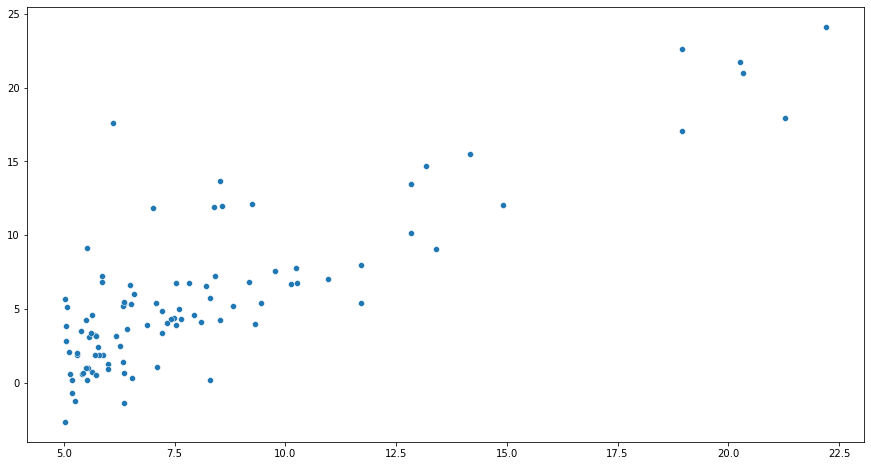

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.scatterplot(x=X, y=y)
plt.show()

In [6]:
import pandas as pd
df=pd.DataFrame({"x":X, "y":y})
df

,x,y
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [7]:
C=df["x"].corr(df["y"])
C

0.837873232526341

### 2.1 Plotting the Data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and cannot be plotted on a 2-d plot. There are many plotting libraries in python (see this [blog post](https://blog.modeanalytics.com/python-data-visualization-libraries/) for a good summary of the most popular ones). 

In this course, we will be exclusively using `matplotlib` to do all our plotting. `matplotlib` is one of the most popular scientific plotting libraries in python and has extensive tools and functions to make beautiful plots. `pyplot` is a module within `matplotlib` which provides a simplified interface to `matplotlib`'s most common plotting tasks, mimicking MATLAB's plotting interface.

<div class="alert alert-block alert-warning">
You might have noticed that we have imported the `pyplot` module at the beginning of this exercise using the command `from matplotlib import pyplot`. This is rather uncommon, and if you look at python code elsewhere or in the `matplotlib` tutorials, you will see that the module is named `plt`. This is used by module renaming by using the import command `import matplotlib.pyplot as plt`. We will not using the short name of `pyplot` module in this class exercises, but you should be aware of this deviation from norm.
</div>


In the following part, your first job is to complete the `plotData` function below. Modify the function and fill in the following code:

```python
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
```

In [8]:
def plotData(x, y):
    """
    Plots the data points x and y into a new figure. Plots the data 
    points and gives the figure axes labels of population and profit.
    
    Parameters
    ----------
    x : array_like
        Data point values for x-axis.

    y : array_like
        Data point values for y-axis. Note x and y should have the same size.
    
    Instructions
    ------------
    Plot the training data into a figure using the "figure" and "plot"
    functions. Set the axes labels using the "xlabel" and "ylabel" functions.
    Assume the population and revenue data have been passed in as the x
    and y arguments of this function.    
    
    Hint
    ----
    You can use the 'ro' option with plot to have the markers
    appear as red circles. Furthermore, you can make the markers larger by
    using plot(..., 'ro', ms=10), where `ms` refers to marker size. You 
    can also set the marker edge color using the `mec` property.
    """
    fig = pyplot.figure()
    # open a new figure
    plt.figure(figsize=(15,8))
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')
    plt.show()
    
    
    # ====================== YOUR CODE HERE ======================= 
    

    # =============================================================


Now run the defined function with the loaded data to visualize the data. The end result should look like the following figure:

![](Figures/dataset1.png)

Execute the next cell to visualize the data.

<Figure size 432x288 with 0 Axes>

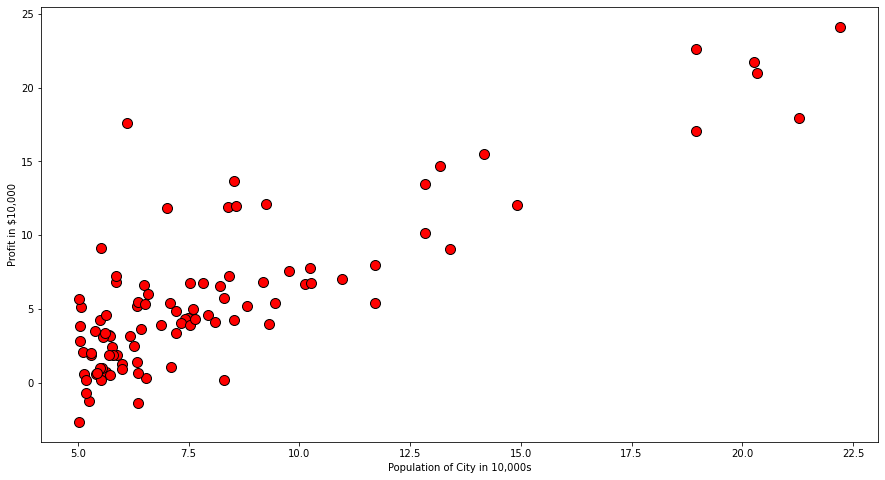

In [9]:
plotData(X, y)

To quickly learn more about the `matplotlib` plot function and what arguments you can provide to it, you can type `?pyplot.plot` in a cell within the jupyter notebook. This opens a separate page showing the documentation for the requested function. You can also search online for plotting documentation. 

To set the markers to red circles, we used the option `'or'` within the `plot` function.

In [ ]:
?pyplot.plot

<a id="section2"></a>
### 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

#### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


#### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [10]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)


In [11]:
dfx=pd.DataFrame(X)
dfx=dfx.rename(columns={0:"x0", 1:"x1"})
dfx

,x0,x1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
...,...,...
92,1.0,5.8707
93,1.0,5.3054
94,1.0,8.2934
95,1.0,13.3940


In [13]:
dfx['x0'].values.shape

(97,)

In [12]:
X_not=dfx['x0'].values
X_notT=X_not.T
X_one=dfx['x1'].values
X_oneT=X_one.T
X_oneT.shape

(97,)

In [14]:
theta=np.array([0,0])
h=np.dot(X, theta)
h-y

array([-17.592  ,  -9.1302 , -13.662  , -11.854  ,  -6.8233 , -11.886  ,
        -4.3483 , -12.     ,  -6.5987 ,  -3.8166 ,  -3.2522 , -15.505  ,
        -3.1551 ,  -7.2258 ,  -0.71618,  -3.5129 ,  -5.3048 ,  -0.56077,
        -3.6518 ,  -5.3893 ,  -3.1386 , -21.767  ,  -4.263  ,  -5.1875 ,
        -3.0825 , -22.638  , -13.501  ,  -7.0467 , -14.692  , -24.147  ,
         1.22   ,  -5.9966 , -12.134  ,  -1.8495 ,  -6.5426 ,  -4.5623 ,
        -4.1164 ,  -3.3928 , -10.117  ,  -5.4974 ,  -0.55657,  -3.9115 ,
        -5.3854 ,  -2.4406 ,  -6.7318 ,  -1.0463 ,  -5.1337 ,  -1.844  ,
        -8.0043 ,  -1.0179 ,  -6.7504 ,  -1.8396 ,  -4.2885 ,  -4.9981 ,
        -1.4233 ,   1.4211 ,  -2.4756 ,  -4.6042 ,  -3.9624 ,  -5.4141 ,
        -5.1694 ,   0.74279, -17.929  , -12.054  , -17.054  ,  -4.8852 ,
        -5.7442 ,  -7.7754 ,  -1.0173 , -20.992  ,  -6.6799 ,  -4.0259 ,
        -1.2784 ,  -3.3411 ,   2.6807 ,  -0.29678,  -3.8845 ,  -5.7014 ,
        -6.7526 ,  -2.0576 ,  -0.47953,  -0.20421, 

In [15]:
J=0
c=np.array([0,0])
cT=c.T
for i in range(97):
    
   # s = np.dot(np.array([0,0].T, X[i])
    J = J + ((np.dot(cT, X[i]) - y[i])**2)
print(J/(2*97))          

32.072733877455654


<a id="section2"></a>
#### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [16]:
def computeCost(X, y, thita):
    """
    Compute cost for linear regression. Computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1), where m is the number of examples,
        and n is the number of features. We assume a vector of one's already 
        appended to the features so we have n+1 columns.
    
    y : array_like
        The values of the function at each data point. This is a vector of
        shape (m, ).
    
    theta : array_like
        The parameters for the regression function. This is a vector of 
        shape (n+1, ).
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. 
    You should set J to the cost.
    """
    
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    J = 0
    
    h = np.dot(X, thita)
    
    J = np.sum(np.square(h-y))
    
                   
    return J/(2*m)
                 
    
    
   

    # ====================== YOUR CODE HERE =====================

    
    # ===========================================================


Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [17]:
J = computeCost(X, y, thita=np.array([0,0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, thita=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


*You should now submit your solutions by executing the following cell.*

In [29]:
grader[2] = computeCost
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (bapanbairagya96@gmail.com)? (Y/n): 2w0R51JZkK5J82VT
Login (email address): bapanbairagya96@gmail.com
Token: t3YtCxuorsPizHgE
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |   0 /  10 | 
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |   0 /  50 | 
                      Feature Normalization |   0 /   0 | 
    Computing Cost (for multiple variables) |   0 /   0 | 
  Gradient Descent (for multiple variables) |   0 /   0 | 
                           Normal Equations |   0 /   0 | 
                                  --------------------------------
                                            |  40 / 100 |  



<a id="section3"></a>
#### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) and to the video lectures if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [18]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays
    # are passed by reference to functions
    theta = theta.copy()
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        h=np.dot(X, theta)
        thetanot = theta[0] - (alpha/m)*(np.sum((h-y).dot(dfx['x0'].values))) # when np.sum is not used one can take....
        thetaone = theta[1] - (alpha/m)*(np.sum((h-y).dot(dfx['x1'].values))) # one variable "theta" and proceed.
        theta = np.array((thetanot, thetaone))
       
                                   
        # ==================== YOUR CODE HERE =================================
        

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented `gradientDescent` function and print the computed $\theta$. We initialize the $\theta$ parameters to 0 and the learning rate $\alpha$ to 0.01. Execute the following cell to check your code.

In [81]:
#theta = np.zeros(2)
#theta

In [82]:
#y

In [83]:
#X[0]

In [84]:
#h=np.dot(X, theta)
#h-y

In [19]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


We will use your final parameters to plot the linear fit. The results should look like the following figure.

![](Figures/regression_result.png)

In [21]:
y_pred=np.dot(X, theta)

<Figure size 432x288 with 0 Axes>

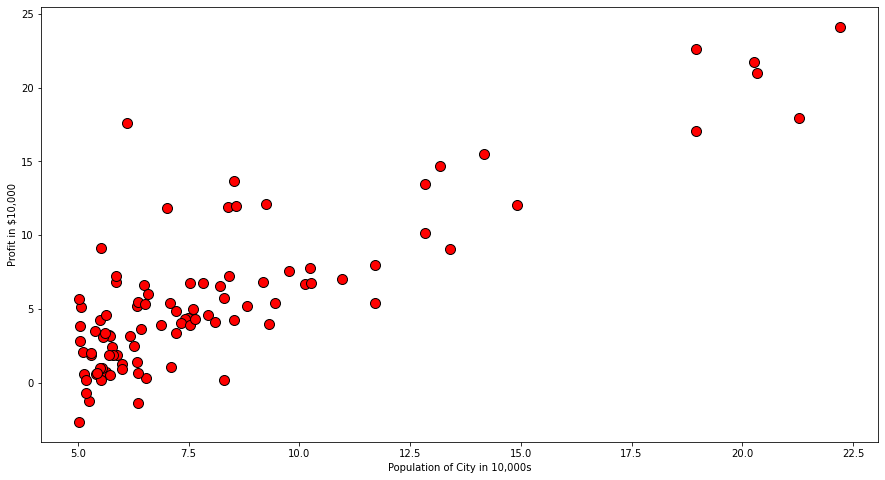

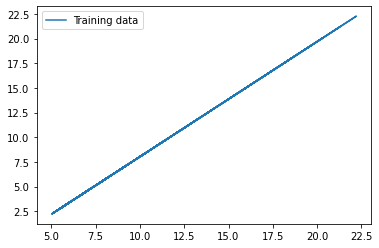

In [22]:
# plot the linear fit
#plt.figure(figsize=(15,8))
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Training data', 'Linear regression']);

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.

<div class="alert alert-block alert-success">
Note the way that the following lines use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in `numpy`.
</div>

<div class="alert alert-block alert-success">
Note that the first argument to the `numpy` function `dot` is a python list. `numpy` can internally converts **valid** python lists to numpy arrays when explicitly provided as arguments to `numpy` functions.
</div>


In [23]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



*You should now submit your solutions by executing the next cell.*

In [24]:
grader[3] = gradientDescent
grader.grade()


Submitting Solutions | Programming Exercise linear-regression

Use token from last successful submission (bapanbairagya96@gmail.com)? (Y/n): xSDJq1A9V1cFetYS
Login (email address): bapanbairagya96@gmail.com
Token: GEqnLx8SpxfjM8Ml


ValueError: shapes (20,) and (97,) not aligned: 20 (dim 0) != 97 (dim 0)

### 2.4 Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

In the next cell, the code is set up to calculate $J(\theta)$ over a grid of values using the `computeCost` function that you wrote. After executing the following cell, you will have a 2-D array of $J(\theta)$ values. Then, those values are used to produce surface and contour plots of $J(\theta)$ using the matplotlib `plot_surface` and `contourf` functions. The plots should look something like the following:

![](Figures/cost_function.png)

The purpose of these graphs is to show you how $J(\theta)$ varies with changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global minimum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of gradient descent moves closer to this point.

In [27]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
theta0_vals.shape

(100,)

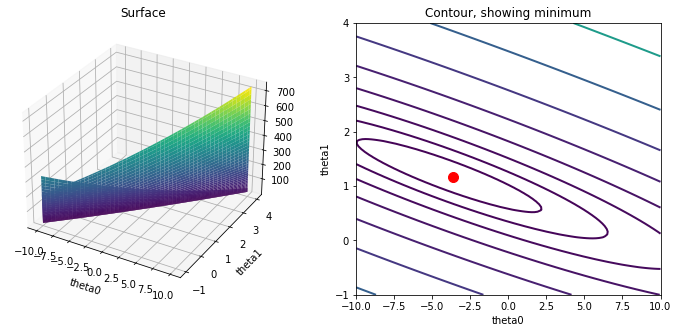

In [25]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')
pass

## Optional Exercises

If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.

For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well. You can still submit your solutions to these exercises to check if your answers are correct.

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `Data/ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house. 

<a id="section4"></a>
### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [2]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [4]:
X

array([[2.104e+03, 3.000e+00],
       [1.600e+03, 3.000e+00],
       [2.400e+03, 3.000e+00],
       [1.416e+03, 2.000e+00],
       [3.000e+03, 4.000e+00],
       [1.985e+03, 4.000e+00],
       [1.534e+03, 3.000e+00],
       [1.427e+03, 3.000e+00],
       [1.380e+03, 3.000e+00],
       [1.494e+03, 3.000e+00],
       [1.940e+03, 4.000e+00],
       [2.000e+03, 3.000e+00],
       [1.890e+03, 3.000e+00],
       [4.478e+03, 5.000e+00],
       [1.268e+03, 3.000e+00],
       [2.300e+03, 4.000e+00],
       [1.320e+03, 2.000e+00],
       [1.236e+03, 3.000e+00],
       [2.609e+03, 4.000e+00],
       [3.031e+03, 4.000e+00],
       [1.767e+03, 3.000e+00],
       [1.888e+03, 2.000e+00],
       [1.604e+03, 3.000e+00],
       [1.962e+03, 4.000e+00],
       [3.890e+03, 3.000e+00],
       [1.100e+03, 3.000e+00],
       [1.458e+03, 3.000e+00],
       [2.526e+03, 3.000e+00],
       [2.200e+03, 3.000e+00],
       [2.637e+03, 3.000e+00],
       [1.839e+03, 2.000e+00],
       [1.000e+03, 1.000e+00],
       [

In [5]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

Your task here is to complete the code in `featureNormalize` function:
- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.”

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In `numpy`, you can use the `std` function to compute the standard deviation. 

For example, the quantity `X[:, 0]` contains all the values of $x_1$ (house sizes) in the training set, so `np.std(X[:, 0])` computes the standard deviation of the house sizes.
At the time that the function `featureNormalize` is called, the extra column of 1’s corresponding to $x_0 = 1$ has not yet been added to $X$. 

You will do this for all the features and your code should work with datasets of all sizes (any number of features / examples). Note that each column of the matrix $X$ corresponds to one feature.

<div class="alert alert-block alert-warning">
**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bedrooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.
</div>
<a id="featureNormalize"></a>

In [6]:
def  featureNormalize(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu)/sigma

    
    # ================================================================
    return X_norm, mu, sigma

Execute the next cell to run the implemented `featureNormalize` function.

In [7]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [8]:
X_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

*You should now submit your solutions.*

In [ ]:
grader[4] = featureNormalize
grader.grade()

After the `featureNormalize` function is tested, we now add the intercept term to `X_norm`:

In [9]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [10]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

<a id="section5"></a>
### 3.2 Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix $X$. The hypothesis function and the batch gradient descent update
rule remain unchanged. 

You should complete the code for the functions `computeCostMulti` and `gradientDescentMulti` to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use the `shape` property of `numpy` arrays to find out how many features are present in the dataset.

<div class="alert alert-block alert-warning">
**Implementation Note:** In the multivariate case, the cost function can
also be written in the following vectorized form:

$$ J(\theta) = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta - \vec{y}) $$

where 

$$ X = \begin{pmatrix}
          - (x^{(1)})^T - \\
          - (x^{(2)})^T - \\
          \vdots \\
          - (x^{(m)})^T - \\ \\
        \end{pmatrix} \qquad \mathbf{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \\\end{bmatrix}$$

the vectorized version is efficient when you are working with numerical computing tools like `numpy`. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.
</div>

<a id="computeCostMulti"></a>

In [11]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
     
    h = np.dot(X, theta)
    
    J = np.sum(np.square(h-y))
    
                   
    return J/(2*m)
                 
    # ======================= YOUR CODE HERE ===========================

    
    # ==================================================================
    return J


In [12]:
J = computeCostMulti(X, y, theta=np.array([0,0,0]))
print('With theta = [0, 0, 0] \nCost computed = %.2f' % J)
#print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCostMulti(X, y, theta=np.array([-1, 2,1]))
print('With theta = [-1, 2, 1]\nCost computed = %.2f' % J)
#print('Expected cost value (approximately) 54.24')

With theta = [0, 0, 0] 
Cost computed = 65591548106.46
With theta = [-1, 2, 1]
Cost computed = 65591622286.15


*You should now submit your solutions.*

In [ ]:
grader[5] = computeCostMulti
grader.grade()

<a id="gradientDescentMulti"></a>

In [13]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        h=np.dot(X, theta)
        theta = theta - (alpha/m)*((h-y).dot(X))

        # ======================= YOUR CODE HERE ==========================

        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [14]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        h=np.dot(X, theta)
        theta = theta - (alpha/m)*((h-y).dot(X))

        # ======================= YOUR CODE HERE ==========================

        
        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
        print("J:",J_history[i])
        print()
        print("Iteration:",i)
        print()
        print("Theta:",theta)
        print("------------------")
    
    #return theta, J_history
# initialize fitting parameters
theta = np.zeros(3)

# some gradient descent settings
iterations = 3000
alpha = 0.01
gradientDescentMulti(X ,y, theta, alpha, iterations)
        


J: 64297776251.62011

Iteration: 0

Theta: [3404.12659574 1057.64133493  547.08821756]
------------------
J: 63031018305.52132

Iteration: 1

Theta: [6774.21192553 2101.64274191 1082.78310833]
------------------
J: 61790694237.53249

Iteration: 2

Theta: [10110.59640202  3132.20441912  1607.2749847 ]
------------------
J: 60576236901.991035

Iteration: 3

Theta: [13413.61703375  4149.52349706  2120.75113489]
------------------
J: 59387091739.9886

Iteration: 4

Theta: [16683.60745915  5153.79408617  2623.39587038]
------------------
J: 58222716488.38939

Iteration: 5

Theta: [19920.89798031  6145.20732373  3115.39057257]
------------------
J: 57082580895.8954

Iteration: 6

Theta: [23125.81559625  7123.95141992  3596.91373875]
------------------
J: 55966166445.97885

Iteration: 7

Theta: [26298.68403603  8090.21170335  4068.14102732]
------------------
J: 54872966086.50778

Iteration: 8

Theta: [29439.82379141  9044.17066566  4529.2453023 ]
------------------
J: 53802483965.89506

Iter

J: 5194949661.2115345

Iteration: 151

Theta: [266527.82905101  75057.97249988  18384.0603208 ]
------------------
J: 5136156997.3727865

Iteration: 152

Theta: [267266.67735625  75262.08940119  18327.00790491]
------------------
J: 5078508333.628749

Iteration: 153

Theta: [267998.13717843  75464.4846083   18269.38302548]
------------------
J: 5021980869.410768

Iteration: 154

Theta: [268722.28240239  75665.17854377  18211.20104805]
------------------
J: 4966552266.331585

Iteration: 155

Theta: [269439.18617411  75864.19133987  18152.47707018]
------------------
J: 4912200638.661631

Iteration: 156

Theta: [270148.92090811  76061.54284303  18093.2259257 ]
------------------
J: 4858904544.005542

Iteration: 157

Theta: [270851.55829478  76257.25261814  18033.46218897]
------------------
J: 4806642974.174524

Iteration: 158

Theta: [271547.16930757  76451.33995282  17973.20017905]
------------------
J: 4755395346.250382

Iteration: 159

Theta: [272235.82421024  76643.82386165  17912.4

------------------
J: 2280656620.229044

Iteration: 301

Theta: [324050.73180521  93686.94715342   8290.92579548]
------------------
J: 2277076963.379789

Iteration: 302

Theta: [324214.3510829   93761.29255142   8230.48857628]
------------------
J: 2273558570.701808

Iteration: 303

Theta: [324376.33416782  93835.23292405   8170.23941942]
------------------
J: 2270100308.2436733

Iteration: 304

Theta: [324536.69742188  93908.77126848   8110.1787123 ]
------------------
J: 2266701063.9442024

Iteration: 305

Theta: [324695.45704341  93981.91054972   8050.30682163]
------------------
J: 2263359747.2005234

Iteration: 306

Theta: [324852.62906872  94054.6537011    7990.62409389]
------------------
J: 2260075288.4447656

Iteration: 307

Theta: [325008.22937378  94127.00362467   7931.13085563]
------------------
J: 2256846638.7292147

Iteration: 308

Theta: [325162.27367578  94198.96319163   7871.8274139 ]
------------------
J: 2253672769.3197455

Iteration: 309

Theta: [325314.77753477  

Theta: [337001.32097513 101712.12182061   1080.59287696]
------------------
J: 2074827487.4326007

Iteration: 458

Theta: [337035.43436112 101746.59097161   1047.32064072]
------------------
J: 2074487002.7699897

Iteration: 459

Theta: [337069.20661326 101780.9017447    1014.1881109 ]
------------------
J: 2074150771.3501894

Iteration: 460

Theta: [337102.64114287 101815.05494137    981.1947773 ]
------------------
J: 2073818730.6667354

Iteration: 461

Theta: [337135.74132718 101849.05135793    948.34013034]
------------------
J: 2073490819.2632043

Iteration: 462

Theta: [337168.51050966 101882.89178556    915.62366106]
------------------
J: 2073166976.714011

Iteration: 463

Theta: [337200.9520003  101916.57701041    883.04486118]
------------------
J: 2072847143.6055593

Iteration: 464

Theta: [337233.06907605 101950.10781362    850.60322308]
------------------
J: 2072531261.5177667

Iteration: 465

Theta: [337264.86498103 101983.48497132    818.29823987]
------------------
J: 20

Iteration: 602

Theta: [339618.2800436  105382.92715431  -2521.33520997]
------------------
J: 2050782290.9379692

Iteration: 603

Theta: [339626.22383891 105400.85786799  -2539.14347134]
------------------
J: 2050712972.6954312

Iteration: 604

Theta: [339634.08819626 105418.70899494  -2556.87405622]
------------------
J: 2050644331.5959501

Iteration: 605

Theta: [339641.87391005 105436.48089609  -2574.52729571]
------------------
J: 2050576360.331217

Iteration: 606

Theta: [339649.58176669 105454.17393058  -2592.10351962]
------------------
J: 2050509051.68421

Iteration: 607

Theta: [339657.21254477 105471.78845582  -2609.60305648]
------------------
J: 2050442398.5278547

Iteration: 608

Theta: [339664.76701506 105489.32482747  -2627.02623354]
------------------
J: 2050376393.8237047

Iteration: 609

Theta: [339672.24594066 105506.78339948  -2644.37337676]
------------------
J: 2050311030.6206443

Iteration: 610

Theta: [339679.650077   105524.16452408  -2661.64481082]
----------

Theta: [340236.74280761 107351.67862601  -4482.97936943]
------------------
J: 2045210936.5513952

Iteration: 753

Theta: [340238.50197528 107360.90638893  -4492.19555179]
------------------
J: 2045193812.251436

Iteration: 754

Theta: [340240.24355127 107370.09348181  -4501.37124477]
------------------
J: 2045176841.680654

Iteration: 755

Theta: [340241.9677115  107379.24008464  -4510.50662553]
------------------
J: 2045160023.4223294

Iteration: 756

Theta: [340243.67463013 107388.34637657  -4519.60187046]
------------------
J: 2045143356.0735097

Iteration: 757

Theta: [340245.36447958 107397.41253597  -4528.65715518]
------------------
J: 2045126838.2448678

Iteration: 758

Theta: [340247.03743053 107406.43874041  -4537.67265458]
------------------
J: 2045110468.5605505

Iteration: 759

Theta: [340248.69365196 107415.42516664  -4546.64854277]
------------------
J: 2045094245.6580386

Iteration: 760

Theta: [340250.33331119 107424.37199064  -4555.58499312]
------------------
J: 204

Theta: [340369.58366275 108317.43108429  -5448.07162852]
------------------
J: 2043838223.499608

Iteration: 893

Theta: [340370.01442186 108322.40552277  -5453.04478533]
------------------
J: 2043833311.9094949

Iteration: 894

Theta: [340370.44087339 108327.3580649   -5457.9960658 ]
------------------
J: 2043828443.6506896

Iteration: 895

Theta: [340370.8630604  108332.28880717  -5462.92556607]
------------------
J: 2043823618.3386843

Iteration: 896

Theta: [340371.28102554 108337.19784559  -5467.83338188]
------------------
J: 2043818835.5924263

Iteration: 897

Theta: [340371.69481103 108342.08527579  -5472.71960853]
------------------
J: 2043814095.0342872

Iteration: 898

Theta: [340372.10445866 108346.95119295  -5477.58434093]
------------------
J: 2043809396.290032

Iteration: 899

Theta: [340372.51000982 108351.79569185  -5482.42767354]
------------------
J: 2043804738.9887838

Iteration: 900

Theta: [340372.91150547 108356.61886683  -5487.24970043]
------------------
J: 204

J: 2043424634.1007872

Iteration: 1046

Theta: [340403.49622085 108874.66198257  -6005.22766348]
------------------
J: 2043423364.0039215

Iteration: 1047

Theta: [340403.58785439 108877.18400313  -6007.74957022]
------------------
J: 2043422105.0694382

Iteration: 1048

Theta: [340403.67857159 108879.69492534  -6010.26038039]
------------------
J: 2043420857.199132

Iteration: 1049

Theta: [340403.76838162 108882.19479804  -6012.76014279]
------------------
J: 2043419620.295664

Iteration: 1050

Theta: [340403.85729355 108884.68366986  -6015.24890603]
------------------
J: 2043418394.2625535

Iteration: 1051

Theta: [340403.94531636 108887.16158923  -6017.72671851]
------------------
J: 2043417179.0041711

Iteration: 1052

Theta: [340404.03245894 108889.62860433  -6020.1936284 ]
------------------
J: 2043415974.4257293

Iteration: 1053

Theta: [340404.11873009 108892.08476317  -6022.64968367]
------------------
J: 2043414780.4332786

Iteration: 1054

Theta: [340404.20413854 108894.530

J: 2043317214.0700343

Iteration: 1200

Theta: [340410.71029363 109157.19020462  -6287.74923711]
------------------
J: 2043316887.7056146

Iteration: 1201

Theta: [340410.72978644 109158.46897112  -6289.02799351]
------------------
J: 2043316564.207517

Iteration: 1202

Theta: [340410.74908432 109159.74211057  -6290.30112301]
------------------
J: 2043316243.550564

Iteration: 1203

Theta: [340410.76818922 109161.00964774  -6291.56865038]
------------------
J: 2043315925.7097964

Iteration: 1204

Theta: [340410.78710307 109162.27160727  -6292.83060027]
------------------
J: 2043315610.6604774

Iteration: 1205

Theta: [340410.80582778 109163.52801371  -6294.08699722]
------------------
J: 2043315298.3780878

Iteration: 1206

Theta: [340410.82436525 109164.7788915   -6295.33786566]
------------------
J: 2043314988.8383207

Iteration: 1207

Theta: [340410.84271734 109166.02426496  -6296.58322993]
------------------
J: 2043314682.017086

Iteration: 1208

Theta: [340410.86088591 109167.2641

Theta: [340412.28456146 109306.80179029  -6437.36022398]
------------------
J: 2043288721.4849927

Iteration: 1365

Theta: [340412.28831159 109307.42221339  -6437.98064632]
------------------
J: 2043288645.3426692

Iteration: 1366

Theta: [340412.29202422 109308.03990643  -6438.5983386 ]
------------------
J: 2043288569.86899

Iteration: 1367

Theta: [340412.29569972 109308.65488141  -6439.21331283]
------------------
J: 2043288495.0580802

Iteration: 1368

Theta: [340412.29933847 109309.26715029  -6439.82558098]
------------------
J: 2043288420.9041228

Iteration: 1369

Theta: [340412.30294083 109309.87672498  -6440.43515496]
------------------
J: 2043288347.4013474

Iteration: 1370

Theta: [340412.30650717 109310.48361735  -6441.04204661]
------------------
J: 2043288274.544036

Iteration: 1371

Theta: [340412.31003784 109311.08783918  -6441.64626775]
------------------
J: 2043288202.3265193

Iteration: 1372

Theta: [340412.31353321 109311.68940224  -6442.24783012]
------------------

Theta: [340412.58370933 109377.86428485  -6508.4226734 ]
------------------
J: 2043282183.6933088

Iteration: 1524

Theta: [340412.58446798 109378.17200942  -6508.73039791]
------------------
J: 2043282164.961985

Iteration: 1525

Theta: [340412.58521904 109378.4783799   -6509.03676833]
------------------
J: 2043282146.3951468

Iteration: 1526

Theta: [340412.5859626  109378.78340225  -6509.34179062]
------------------
J: 2043282127.991351

Iteration: 1527

Theta: [340412.58669872 109379.0870824   -6509.64547071]
------------------
J: 2043282109.749164

Iteration: 1528

Theta: [340412.58742747 109379.38942626  -6509.94781451]
------------------
J: 2043282091.667168

Iteration: 1529

Theta: [340412.58814894 109379.69043971  -6510.2488279 ]
------------------
J: 2043282073.7439551

Iteration: 1530

Theta: [340412.5888632  109379.99012859  -6510.54851673]
------------------
J: 2043282055.9781322

Iteration: 1531

Theta: [340412.58957031 109380.28849875  -6510.84688683]
------------------


Theta: [340412.64541263 109414.31307509  -6544.8714599 ]
------------------
J: 2043280539.6081436

Iteration: 1691

Theta: [340412.64555424 109414.46041301  -6545.01879782]
------------------
J: 2043280535.3140435

Iteration: 1692

Theta: [340412.64569445 109414.60710259  -6545.1654874 ]
------------------
J: 2043280531.0576513

Iteration: 1693

Theta: [340412.64583325 109414.75314669  -6545.31153149]
------------------
J: 2043280526.8386357

Iteration: 1694

Theta: [340412.64597066 109414.89854815  -6545.45693295]
------------------
J: 2043280522.6566684

Iteration: 1695

Theta: [340412.6461067  109415.0433098   -6545.60169459]
------------------
J: 2043280518.5114245

Iteration: 1696

Theta: [340412.64624137 109415.18743445  -6545.74581923]
------------------
J: 2043280514.4025807

Iteration: 1697

Theta: [340412.64637471 109415.3309249   -6545.88930968]
------------------
J: 2043280510.3298187

Iteration: 1698

Theta: [340412.6465067  109415.47378394  -6546.03216872]
---------------

Iteration: 1854

Theta: [340412.65684994 109431.55117328  -6562.10955782]
------------------
J: 2043280165.7119725

Iteration: 1855

Theta: [340412.65687718 109431.62265791  -6562.18104245]
------------------
J: 2043280164.7011657

Iteration: 1856

Theta: [340412.65690416 109431.69382798  -6562.25221252]
------------------
J: 2043280163.6992342

Iteration: 1857

Theta: [340412.65693086 109431.76468489  -6562.32306943]
------------------
J: 2043280162.7061024

Iteration: 1858

Theta: [340412.65695729 109431.83523     -6562.39361454]
------------------
J: 2043280161.7216904

Iteration: 1859

Theta: [340412.65698347 109431.90546469  -6562.46384923]
------------------
J: 2043280160.7459226

Iteration: 1860

Theta: [340412.65700938 109431.97539032  -6562.53377486]
------------------
J: 2043280159.7787244

Iteration: 1861

Theta: [340412.65703503 109432.04500826  -6562.6033928 ]
------------------
J: 2043280158.8200188

Iteration: 1862

Theta: [340412.65706042 109432.11431986  -6562.67270439

J: 2043280083.7928755

Iteration: 1996

Theta: [340412.6589206  109439.11163786  -6569.67002238]
------------------
J: 2043280083.5014238

Iteration: 1997

Theta: [340412.65892714 109439.14985397  -6569.70823849]
------------------
J: 2043280083.2125313

Iteration: 1998

Theta: [340412.65893361 109439.18790191  -6569.74628643]
------------------
J: 2043280082.9261768

Iteration: 1999

Theta: [340412.65894002 109439.22578243  -6569.78416695]
------------------
J: 2043280082.6423352

Iteration: 2000

Theta: [340412.65894637 109439.26349627  -6569.82188079]
------------------
J: 2043280082.3609872

Iteration: 2001

Theta: [340412.65895265 109439.30104415  -6569.85942867]
------------------
J: 2043280082.0821102

Iteration: 2002

Theta: [340412.65895887 109439.33842681  -6569.89681133]
------------------
J: 2043280081.805681

Iteration: 2003

Theta: [340412.65896502 109439.37564497  -6569.93402949]
------------------
J: 2043280081.5316792

Iteration: 2004

Theta: [340412.65897112 109439.41

J: 2043280058.1447523

Iteration: 2164

Theta: [340412.65945363 109443.65648671  -6574.21487123]
------------------
J: 2043280058.0785246

Iteration: 2165

Theta: [340412.65945484 109443.674704    -6574.23308851]
------------------
J: 2043280058.0128782

Iteration: 2166

Theta: [340412.65945604 109443.69284112  -6574.25122564]
------------------
J: 2043280057.9478085

Iteration: 2167

Theta: [340412.65945722 109443.71089843  -6574.26928295]
------------------
J: 2043280057.8833098

Iteration: 2168

Theta: [340412.65945839 109443.72887628  -6574.2872608 ]
------------------
J: 2043280057.8193784

Iteration: 2169

Theta: [340412.65945955 109443.74677503  -6574.30515954]
------------------
J: 2043280057.7560072

Iteration: 2170

Theta: [340412.6594607  109443.76459501  -6574.32297953]
------------------
J: 2043280057.693194

Iteration: 2171

Theta: [340412.65946184 109443.78233658  -6574.3407211 ]
------------------
J: 2043280057.6309302

Iteration: 2172

Theta: [340412.65946297 109443.80

J: 2043280052.4912198

Iteration: 2321

Theta: [340412.65954953 109445.72488112  -6576.28326564]
------------------
J: 2043280052.4746375

Iteration: 2322

Theta: [340412.65954978 109445.73399679  -6576.29238131]
------------------
J: 2043280052.4582

Iteration: 2323

Theta: [340412.65955002 109445.74307235  -6576.30145687]
------------------
J: 2043280052.4419081

Iteration: 2324

Theta: [340412.65955027 109445.75210797  -6576.31049249]
------------------
J: 2043280052.425758

Iteration: 2325

Theta: [340412.65955051 109445.76110383  -6576.31948835]
------------------
J: 2043280052.4097507

Iteration: 2326

Theta: [340412.65955075 109445.77006011  -6576.32844463]
------------------
J: 2043280052.393884

Iteration: 2327

Theta: [340412.65955099 109445.77897697  -6576.33736149]
------------------
J: 2043280052.3781552

Iteration: 2328

Theta: [340412.65955122 109445.7878546   -6576.34623912]
------------------
J: 2043280052.3625665

Iteration: 2329

Theta: [340412.65955145 109445.796693


Theta: [340412.659569   109446.73208163  -6577.29046615]
------------------
J: 2043280051.096973

Iteration: 2473

Theta: [340412.65956905 109446.73676529  -6577.29514981]
------------------
J: 2043280051.0926344

Iteration: 2474

Theta: [340412.65956911 109446.74142834  -6577.29981286]
------------------
J: 2043280051.0883331

Iteration: 2475

Theta: [340412.65956916 109446.74607087  -6577.30445538]
------------------
J: 2043280051.0840697

Iteration: 2476

Theta: [340412.65956922 109446.75069296  -6577.30907748]
------------------
J: 2043280051.0798433

Iteration: 2477

Theta: [340412.65956927 109446.75529472  -6577.31367924]
------------------
J: 2043280051.0756555

Iteration: 2478

Theta: [340412.65956932 109446.75987624  -6577.31826076]
------------------
J: 2043280051.0715034

Iteration: 2479

Theta: [340412.65956937 109446.76443759  -6577.32282211]
------------------
J: 2043280051.0673876

Iteration: 2480

Theta: [340412.65956942 109446.76897887  -6577.32736339]
---------------

Theta: [340412.65957344 109447.28459028  -6577.8429748 ]
------------------
J: 2043280050.7171137

Iteration: 2639

Theta: [340412.65957345 109447.28684271  -6577.84522723]
------------------
J: 2043280050.71611

Iteration: 2640

Theta: [340412.65957346 109447.28908524  -6577.84746976]
------------------
J: 2043280050.715115

Iteration: 2641

Theta: [340412.65957347 109447.2913179   -6577.84970242]
------------------
J: 2043280050.714129

Iteration: 2642

Theta: [340412.65957348 109447.29354073  -6577.85192525]
------------------
J: 2043280050.713152

Iteration: 2643

Theta: [340412.65957349 109447.29575378  -6577.8541383 ]
------------------
J: 2043280050.7121832

Iteration: 2644

Theta: [340412.6595735  109447.2979571   -6577.85634162]
------------------
J: 2043280050.7112231

Iteration: 2645

Theta: [340412.65957351 109447.30015072  -6577.85853524]
------------------
J: 2043280050.7102716

Iteration: 2646

Theta: [340412.65957352 109447.30233468  -6577.8607192 ]
------------------
J

Iteration: 2780

Theta: [340412.65957422 109447.5228159   -6578.08120042]
------------------
J: 2043280050.6354911

Iteration: 2781

Theta: [340412.65957422 109447.52402006  -6578.08240458]
------------------
J: 2043280050.6352046

Iteration: 2782

Theta: [340412.65957423 109447.52521893  -6578.08360345]
------------------
J: 2043280050.6349201

Iteration: 2783

Theta: [340412.65957423 109447.52641252  -6578.08479704]
------------------
J: 2043280050.6346383

Iteration: 2784

Theta: [340412.65957423 109447.52760086  -6578.08598538]
------------------
J: 2043280050.634359

Iteration: 2785

Theta: [340412.65957423 109447.52878397  -6578.08716849]
------------------
J: 2043280050.6340826

Iteration: 2786

Theta: [340412.65957424 109447.52996188  -6578.0883464 ]
------------------
J: 2043280050.6338081

Iteration: 2787

Theta: [340412.65957424 109447.5311346   -6578.08951912]
------------------
J: 2043280050.633536

Iteration: 2788

Theta: [340412.65957424 109447.53230216  -6578.09068668]


Theta: [340412.65957442 109447.6613369   -6578.21972142]
------------------
J: 2043280050.610793

Iteration: 2941

Theta: [340412.65957442 109447.66193153  -6578.22031605]
------------------
J: 2043280050.610723

Iteration: 2942

Theta: [340412.65957442 109447.66252354  -6578.22090806]
------------------
J: 2043280050.6106539

Iteration: 2943

Theta: [340412.65957442 109447.66311295  -6578.22149747]
------------------
J: 2043280050.6105852

Iteration: 2944

Theta: [340412.65957442 109447.66369976  -6578.22208428]
------------------
J: 2043280050.6105175

Iteration: 2945

Theta: [340412.65957442 109447.664284    -6578.22266851]
------------------
J: 2043280050.61045

Iteration: 2946

Theta: [340412.65957442 109447.66486566  -6578.22325017]
------------------
J: 2043280050.6103828

Iteration: 2947

Theta: [340412.65957442 109447.66544476  -6578.22382928]
------------------
J: 2043280050.6103165

Iteration: 2948

Theta: [340412.65957442 109447.66602131  -6578.22440583]
------------------


In [55]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [15]:
# initialize fitting parameters
theta = np.zeros(3)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescentMulti(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
#print('Expected theta values (approximately): [-3.6303, 1.1664]')

J: 64297776251.62011

Iteration: 0

Theta: [3404.12659574 1057.64133493  547.08821756]
------------------
J: 63031018305.52132

Iteration: 1

Theta: [6774.21192553 2101.64274191 1082.78310833]
------------------
J: 61790694237.53249

Iteration: 2

Theta: [10110.59640202  3132.20441912  1607.2749847 ]
------------------
J: 60576236901.991035

Iteration: 3

Theta: [13413.61703375  4149.52349706  2120.75113489]
------------------
J: 59387091739.9886

Iteration: 4

Theta: [16683.60745915  5153.79408617  2623.39587038]
------------------
J: 58222716488.38939

Iteration: 5

Theta: [19920.89798031  6145.20732373  3115.39057257]
------------------
J: 57082580895.8954

Iteration: 6

Theta: [23125.81559625  7123.95141992  3596.91373875]
------------------
J: 55966166445.97885

Iteration: 7

Theta: [26298.68403603  8090.21170335  4068.14102732]
------------------
J: 54872966086.50778

Iteration: 8

Theta: [29439.82379141  9044.17066566  4529.2453023 ]
------------------
J: 53802483965.89506

Iter


Theta: [289982.22899912  81756.95704082  15925.45375072]
------------------
J: 3574489196.1863747

Iteration: 190

Theta: [290486.53330487  81907.8514872   15855.47528407]
------------------
J: 3546960382.024053

Iteration: 191

Theta: [290985.79456757  82057.62884557  15785.35164269]
------------------
J: 3519956047.350615

Iteration: 192

Theta: [291480.06321764  82206.30109975  15715.09053363]
------------------
J: 3493465882.846028

Iteration: 193

Theta: [291969.38918121  82353.88007056  15644.69951979]
------------------
J: 3467479785.6120844

Iteration: 194

Theta: [292453.82188514  82500.37741826  15574.18602226]
------------------
J: 3441987854.979558

Iteration: 195

Theta: [292933.41026203  82645.80464494  15503.5573226 ]
------------------
J: 3416980388.40181

Iteration: 196

Theta: [293408.20275516  82790.1730969   15432.82056516]
------------------
J: 3392447877.4330564

Iteration: 197

Theta: [293878.24732335  82933.49396699  15361.98275931]
------------------
J: 336838

Iteration: 342

Theta: [329576.44865701  96431.98283441   5969.51192305]
------------------
J: 2172165434.4062343

Iteration: 343

Theta: [329684.81076618  96491.87703197   5916.91754302]
------------------
J: 2170392011.156456

Iteration: 344

Theta: [329792.08925427  96551.46679883   5864.51371892]
------------------
J: 2168646949.8385487

Iteration: 345

Theta: [329898.29495747  96610.75411225   5812.30024991]
------------------
J: 2166929746.2692766

Iteration: 346

Theta: [330003.43860364  96669.74093084   5760.27692607]
------------------
J: 2165239905.7892857

Iteration: 347

Theta: [330107.53081335  96728.42919479   5708.44352864]
------------------
J: 2163576943.07746

Iteration: 348

Theta: [330210.58210096  96786.82082613   5656.79983015]
------------------
J: 2161940381.968933

Iteration: 349

Theta: [330312.60287569  96844.91772894   5605.34559466]
------------------
J: 2160329755.2767296

Iteration: 350

Theta: [330413.60344268  96902.72178956   5554.08057792]
-----------

Iteration: 491

Theta: [3.37988722e+05 1.02799792e+05 2.46932895e+01]
------------------
J: 2065306849.5491135

Iteration: 492

Theta: [ 3.38012961e+05  1.02829298e+05 -4.11054920e+00]
------------------
J: 2065081395.0112448

Iteration: 493

Theta: [ 3.38036958e+05  1.02858669e+05 -3.27915686e+01]
------------------
J: 2064858557.8551526

Iteration: 494

Theta: [ 3.38060715e+05  1.02887907e+05 -6.13502480e+01]
------------------
J: 2064638302.4028141

Iteration: 495

Theta: [ 3.38084235e+05  1.02917013e+05 -8.97870652e+01]
------------------
J: 2064420593.5422986

Iteration: 496

Theta: [ 3.38107519e+05  1.02945987e+05 -1.18102497e+02]
------------------
J: 2064205396.7177572

Iteration: 497

Theta: [ 3.3813057e+05  1.0297483e+05 -1.4629702e+02]
------------------
J: 2063992677.919605

Iteration: 498

Theta: [ 3.38153391e+05  1.03003542e+05 -1.74371107e+02]
------------------
J: 2063782403.6748846

Iteration: 499

Theta: [ 3.38175984e+05  1.03032124e+05 -2.02325233e+02]
--------------

Theta: [339902.18207147 106101.14174548  -3235.63027387]
------------------
J: 2048287154.616142

Iteration: 647

Theta: [339907.2868465  106115.89013134  -3250.31735078]
------------------
J: 2048241765.7713988

Iteration: 648

Theta: [339912.34057378 106130.57327615  -3264.94014304]
------------------
J: 2048196803.7587771

Iteration: 649

Theta: [339917.34376379 106145.19147236  -3279.49892817]
------------------
J: 2048152264.2677324

Iteration: 650

Theta: [339922.2969219  106159.74501103  -3293.99398256]
------------------
J: 2048108143.0367663

Iteration: 651

Theta: [339927.20054842 106174.23418186  -3308.42558144]
------------------
J: 2048064435.8527725

Iteration: 652

Theta: [339932.05513868 106188.65927321  -3322.79399895]
------------------
J: 2048021138.5503943

Iteration: 653

Theta: [339936.86118304 106203.02057207  -3337.09950805]
------------------
J: 2047978247.0113857

Iteration: 654

Theta: [339941.61916695 106217.31836409  -3351.34238063]
------------------
J: 20

J: 2044645108.0400336

Iteration: 792

Theta: [340294.97622558 107690.77325958  -4821.72745149]
------------------
J: 2044633044.075776

Iteration: 793

Theta: [340296.15305907 107698.50695432  -4829.45497177]
------------------
J: 2044621087.5809388

Iteration: 794

Theta: [340297.31812422 107706.20658369  -4837.148523  ]
------------------
J: 2044609237.581308

Iteration: 795

Theta: [340298.47153873 107713.87229814  -4844.80825412]
------------------
J: 2044597493.1118329

Iteration: 796

Theta: [340299.61341908 107721.50424742  -4852.43431341]
------------------
J: 2044585853.2165337

Iteration: 797

Theta: [340300.74388064 107729.10258064  -4860.02684852]
------------------
J: 2044574316.9484062

Iteration: 798

Theta: [340301.86303758 107736.66744624  -4867.58600646]
------------------
J: 2044562883.3693335

Iteration: 799

Theta: [340302.97100295 107744.19899198  -4875.11193358]
------------------
J: 2044551551.5499983

Iteration: 800

Theta: [340304.06788866 107751.69736499  -4

------------------
J: 2043645315.8394716

Iteration: 941

Theta: [340386.33514221 108537.11891546  -5667.71532546]
------------------
J: 2043642104.4858868

Iteration: 942

Theta: [340386.59838653 108541.1264083   -5671.7222251 ]
------------------
J: 2043638921.4088042

Iteration: 943

Theta: [340386.85899841 108545.11626352  -5675.7114964 ]
------------------
J: 2043635766.3583922

Iteration: 944

Theta: [340387.11700417 108549.08855881  -5679.68321686]
------------------
J: 2043632639.0870478

Iteration: 945

Theta: [340387.37242987 108553.04337147  -5683.63746367]
------------------
J: 2043629539.349367

Iteration: 946

Theta: [340387.62530132 108556.9807785   -5687.57431367]
------------------
J: 2043626466.902134

Iteration: 947

Theta: [340387.87564405 108560.90085652  -5691.49384335]
------------------
J: 2043623421.504295

Iteration: 948

Theta: [340388.12348335 108564.80368184  -5695.39612889]
------------------
J: 2043620402.9169412

Iteration: 949

Theta: [340388.36884426 1

Theta: [340406.46763024 108965.22615137  -6095.7884878 ]
------------------
J: 2043381640.9673815

Iteration: 1086

Theta: [340406.52954969 108967.34964117  -6097.91191594]
------------------
J: 2043380748.6637168

Iteration: 1087

Theta: [340406.59084993 108969.46378656  -6100.02600065]
------------------
J: 2043379864.199788

Iteration: 1088

Theta: [340406.65153718 108971.56862868  -6102.13078303]
------------------
J: 2043378987.5066724

Iteration: 1089

Theta: [340406.71161755 108973.66420847  -6104.22630402]
------------------
J: 2043378118.5160484

Iteration: 1090

Theta: [340406.77109712 108975.7505667   -6106.31260435]
------------------
J: 2043377257.1601996

Iteration: 1091

Theta: [340406.8299819  108977.82774394  -6108.3897246 ]
------------------
J: 2043376403.372005

Iteration: 1092

Theta: [340406.88827782 108979.8957806   -6110.45770516]
------------------
J: 2043375557.084935

Iteration: 1093

Theta: [340406.94599079 108981.9547169   -6112.51658625]
------------------

Theta: [340411.12806712 109186.37651515  -6316.93534397]
------------------
J: 2043309859.6444352

Iteration: 1225

Theta: [340411.14338219 109187.52685117  -6318.08567307]
------------------
J: 2043309597.869726

Iteration: 1226

Theta: [340411.15854412 109188.6721253   -6319.23094037]
------------------
J: 2043309338.3939912

Iteration: 1227

Theta: [340411.17355442 109189.81235981  -6320.37116816]
------------------
J: 2043309081.1970387

Iteration: 1228

Theta: [340411.18841462 109190.94757687  -6321.50637861]
------------------
J: 2043308826.2588518

Iteration: 1229

Theta: [340411.20312622 109192.07779857  -6322.63659381]
------------------
J: 2043308573.5595918

Iteration: 1230

Theta: [340411.2176907  109193.20304689  -6323.76183572]
------------------
J: 2043308323.0795918

Iteration: 1231

Theta: [340411.23210954 109194.32334371  -6324.88212623]
------------------
J: 2043308074.7993612

Iteration: 1232

Theta: [340411.24638419 109195.43871082  -6325.99748713]
----------------

Theta: [340412.34975049 109318.13442604  -6448.69284703]
------------------
J: 2043287383.6237433

Iteration: 1384

Theta: [340412.35284873 109318.70498176  -6449.26340218]
------------------
J: 2043287319.2298155

Iteration: 1385

Theta: [340412.35591599 109319.27302684  -6449.83144671]
------------------
J: 2043287255.4013593

Iteration: 1386

Theta: [340412.35895257 109319.83857234  -6450.39699165]
------------------
J: 2043287192.1334088

Iteration: 1387

Theta: [340412.36195879 109320.40162925  -6450.96004802]
------------------
J: 2043287129.4210448

Iteration: 1388

Theta: [340412.36493495 109320.96220852  -6451.52062675]
------------------
J: 2043287067.2593844

Iteration: 1389

Theta: [340412.36788134 109321.52032105  -6452.07873876]
------------------
J: 2043287005.6435943

Iteration: 1390

Theta: [340412.37079827 109322.0759777   -6452.6343949 ]
------------------
J: 2043286944.5688808

Iteration: 1391

Theta: [340412.37368604 109322.62918928  -6453.18760596]
---------------

TypeError: cannot unpack non-iterable NoneType object

In [46]:
theta = np.zeros(3)
theta

array([0., 0., 0.])

*You should now submit your solutions.*

In [ ]:
grader[6] = gradientDescentMulti
grader.grade()

#### 3.2.1 Optional (ungraded) exercise: Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the following code and changing the part of the code that sets the learning rate.

Use your implementation of `gradientDescentMulti` function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of $J(\theta)$ values in a vector $J$.

After the last iteration, plot the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar as the following Figure. 

![](Figures/learning_rate.png)

If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

<div class="alert alert-block alert-warning">
**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and ‘blow up’, resulting in values which are too large for computer calculations. In these situations, `numpy` will tend to return
NaNs. NaN stands for ‘not a number’ and is often caused by undefined operations that involve −∞ and +∞.
</div>

<div class="alert alert-block alert-warning">
**MATPLOTLIB tip:** To compare how different learning learning rates affect convergence, it is helpful to plot $J$ for several learning rates on the same figure. This can be done by making `alpha` a python list, and looping across the values within this list, and calling the plot function in every iteration of the loop. It is also useful to have a legend to distinguish the different lines within the plot. Search online for `pyplot.legend` for help on showing legends in `matplotlib`.
</div>

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!
Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next,
use this value of $\theta$ to predict the price of a house with 1650 square feet and
3 bedrooms. You will use value later to check your implementation of the normal equations. Don’t forget to normalize your features when you make this prediction!

In [ ]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `computeCost`
and `gradientDescent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.

Finally, you should complete the code at the end to predict the price
of a 1650 sq-ft, 3 br house.

Hint
----
At prediction, make sure you do the same feature normalization.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

price = 0   # You should change this

# ===================================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

*You do not need to submit any solutions for this optional (ungraded) part.*

<a id="section7"></a>
### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent. 

First, we will reload the data to ensure that the variables have not been modified. Remember that while you do not need to scale your features, we still need to add a column of 1’s to the $X$ matrix to have an intercept term ($\theta_0$). The code in the next cell will add the column of 1’s to X for you.

In [57]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [18]:
y

array([399900., 329900., 369000., 232000., 539900., 299900., 314900.,
       198999., 212000., 242500., 239999., 347000., 329999., 699900.,
       259900., 449900., 299900., 199900., 499998., 599000., 252900.,
       255000., 242900., 259900., 573900., 249900., 464500., 469000.,
       475000., 299900., 349900., 169900., 314900., 579900., 285900.,
       249900., 229900., 345000., 549000., 287000., 368500., 329900.,
       314000., 299000., 179900., 299900., 239500.])

In [16]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [17]:
#X_norm

Complete the code for the function `normalEqn` below to use the formula above to calculate $\theta$. 

<a id="normalEqn"></a>

In [20]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    #theta = np.zeros(X.shape[1])
    XT = X.T
    M = np.dot(XT,X)
    M_inv = la.pinv(M)
    A = np.dot(M_inv,XT)
    theta = np.dot(A,y)
    
    # ===================== YOUR CODE HERE ============================

    
    # =================================================================
    return theta

In [22]:
theta=normalEqn(X, y)
print("theta:",v)

theta: [340412.65957447 109447.79646964  -6578.35485416]


*You should now submit your solutions.*

In [ ]:
grader[7] = normalEqn
grader.grade()

Optional (ungraded) exercise: Now, once you have found $\theta$ using this
method, use it to make a price prediction for a 1650-square-foot house with
3 bedrooms. You should find that gives the same predicted price as the value
you obtained using the model fit with gradient descent (in Section 3.2.1).

In [25]:
# Calculate the parameters from the normal equation
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================
x = np.array([1,1650,3])
price = np.dot(theta,x) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [340412.65957447 109447.79646964  -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $180909542
